# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# **DATA GATHERING / LOADING**

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

# **ASSESSING DATA**

## **Inavlid Value**

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## **Missing Value**

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## **Duplicate Value**

In [7]:
df.duplicated().sum()

0

Karena tidak ada yang perlu dibersihkan, jadi saya tidak melakukan cleaning data pada dataset tesebut


# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Total Pasien Berdasarkan Jenis Obat**

In [8]:
drug = df['Drug'].value_counts()
drug

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

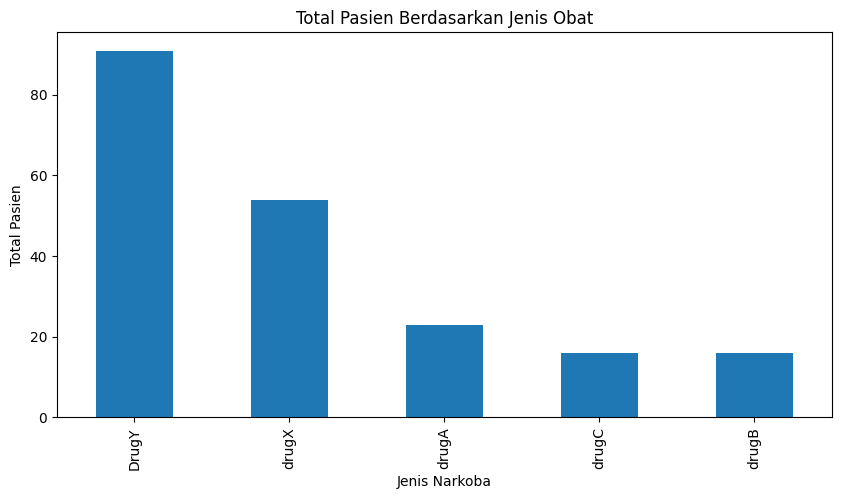

In [9]:
plt.figure(figsize=(10,5))
drug.plot(kind='bar')
plt.title('Total Pasien Berdasarkan Jenis Obat')
plt.xlabel("Jenis Narkoba")
plt.ylabel('Total Pasien')
plt.show()

## **Perbandingan Jumlah Pasien Berdasarkan Jenis Kelamin**

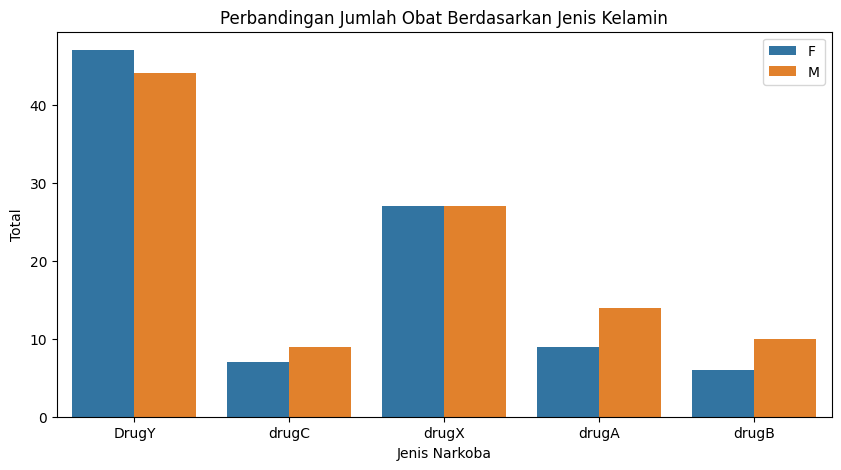

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(
    x = 'Drug',
    hue = 'Sex',
    data = df,
)
plt.title('Perbandingan Jumlah Obat Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Narkoba')
plt.ylabel('Total')
plt.legend()
plt.show()

## **Perbandingan Jumlah Pengguna Obat Berdasarkan Tekanan Darah**

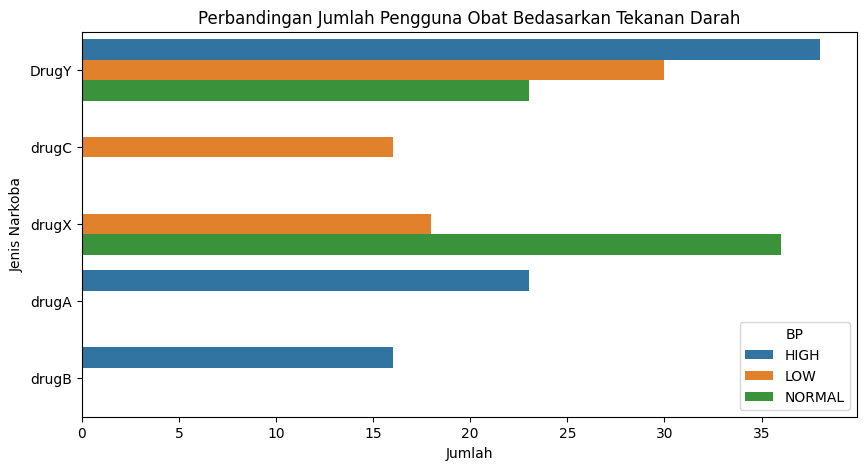

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(
    y = 'Drug',
    hue = 'BP',
    data = df
)
plt.title('Perbandingan Jumlah Pengguna Obat Bedasarkan Tekanan Darah')
plt.ylabel('Jenis Narkoba')
plt.xlabel('Jumlah')
plt.show()

## **Rata-Rata Kadar Na/K Dalam Darah Pasien Berdasarkan Jenis Obat**

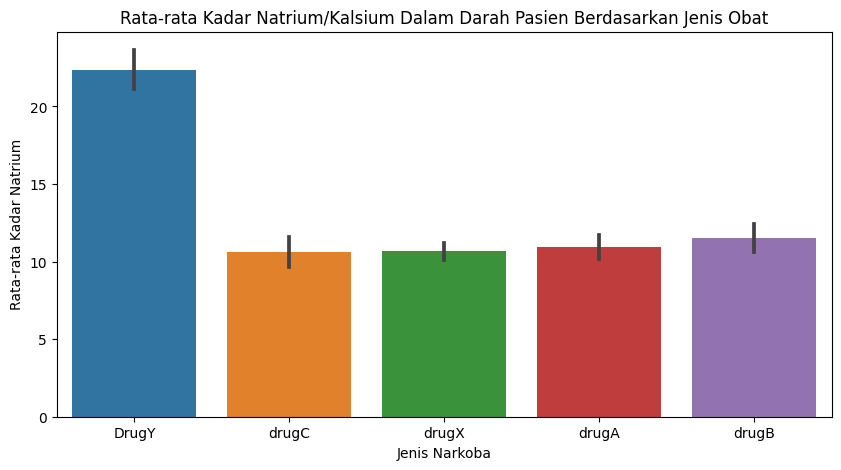

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Na_to_K'], x=df['Drug'], data=df)
plt.title('Rata-rata Kadar Natrium/Kalsium Dalam Darah Pasien Berdasarkan Jenis Obat')
plt.xlabel('Jenis Narkoba')
plt.ylabel('Rata-rata Kadar Natrium')
plt.show()

## **Persentase Pengguna Jenis Obat**

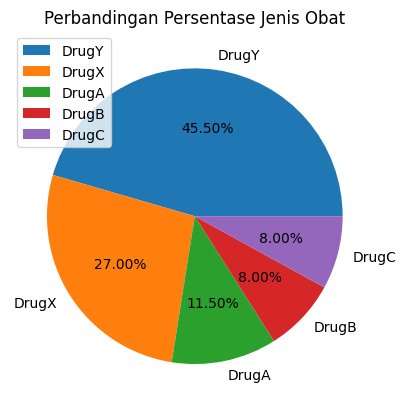

In [13]:
plt.pie(df['Drug'].value_counts(), labels=['DrugY', 'DrugX', 'DrugA', 'DrugB', 'DrugC'], autopct='%1.2f%%')
plt.legend()
plt.title('Perbandingan Persentase Jenis Obat')
plt.show()

# **PREPROCESSING DATA**

## **Pelabelan Data**

In [14]:
le = LabelEncoder()

df['Sex'] = df['Sex'].map({'F':0,'M':1})
df['BP'] = df['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})
df['Drug'] = df['Drug'].map({
    'drugA':0,
    'drugB':1,
    'drugC':2,
    'drugX':3,
    'DrugY':4
})

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


## **Standarisasi/Skalasi Data**

In [15]:
X = df.drop(columns='Drug', axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


In [16]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [17]:
standarized_data = scaler.transform(X)
print(standarized_data)

[[-1.29159102 -1.040833    1.11692063  0.97043679  1.28652212]
 [ 0.16269866  0.96076892 -1.2722144   0.97043679 -0.4151454 ]
 [ 0.16269866  0.96076892 -1.2722144   0.97043679 -0.82855818]
 [-0.988614   -1.040833   -0.07764689  0.97043679 -1.14996267]
 [ 1.0110343  -1.040833   -1.2722144   0.97043679  0.27179427]
 [-1.35218642 -1.040833   -0.07764689  0.97043679 -1.03769314]
 [ 0.28388946 -1.040833   -0.07764689  0.97043679  0.02643885]
 [-0.20087376  0.96076892 -1.2722144   0.97043679 -0.70046821]
 [ 0.9504389   0.96076892 -0.07764689  0.97043679 -0.12676951]
 [-0.07968296  0.96076892 -1.2722144  -1.03046381  0.45567206]
 [ 0.16269866 -1.040833   -1.2722144   0.97043679 -0.59916196]
 [-0.62504158 -1.040833    1.11692063 -1.03046381  0.43221897]
 [-0.07968296  0.96076892 -1.2722144   0.97043679 -0.09832049]
 [ 1.79877454 -1.040833   -1.2722144   0.97043679  0.674105  ]
 [ 0.34448487 -1.040833   -0.07764689  0.97043679 -0.46926791]
 [-1.71575884 -1.040833    1.11692063 -1.03046381 -0.07

## **Pembagian Data Training dan Testing**

In [18]:
X = standarized_data
y = df['Drug']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)

# **PEMODELAN DATA**

## **Menggunakan Algoritma Support Vector Classifier (SVC)**

In [20]:
SVC_model = svm.SVC(kernel='linear')

In [21]:
SVC_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
X_train_predict = SVC_model.predict(X_train)
train_data_accuracy_SVC = accuracy_score(X_train_predict, y_train)

In [23]:
X_test_predict = SVC_model.predict(X_test)
test_data_accuracy_SVC = accuracy_score(X_test_predict, y_test)

In [24]:
print("Accuracy Training : ", train_data_accuracy_SVC)
print("Accuracy Testing : ", test_data_accuracy_SVC)

Accuracy Training :  0.9625
Accuracy Testing :  0.9


## **Menggunakan Algoritma Random Forest Classifier (RF)**

In [25]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [26]:
X_train_predict = RF_model.predict(X_train)
train_data_accuracy_RF = accuracy_score(X_train_predict, y_train)

In [27]:
X_test_predict = RF_model.predict(X_test)
test_data_accuracy_RF = accuracy_score(X_test_predict, y_test)

In [28]:
print("Accuracy Testing : ", test_data_accuracy_RF)
print("Accuracy Training : ", train_data_accuracy_RF)

Accuracy Testing :  1.0
Accuracy Training :  1.0


## **Menggunakan Algoritma Logistic Regression (LR)**

In [29]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
X_train_predict = LR_model.predict(X_train)
train_data_accuracy_LR = accuracy_score(X_train_predict, y_train)

In [31]:
X_test_predict = LR_model.predict(X_test)
test_data_accuracy_LR = accuracy_score(X_test_predict, y_test)

In [32]:
print("Accuracy Training : ", train_data_accuracy_LR)
print("Accuracy Testing : ", test_data_accuracy_LR)

Accuracy Training :  0.96875
Accuracy Testing :  0.95


# **CONTOH PENGIMPLEMENTASIAN**

In [33]:
input_data = (40,0,0,0,11.349)


input_data_array = np.array(input_data)
input_reshape = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)

prediction = RF_model.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print("Jenis Obat Yang Digunakan DrugA")
elif(prediction[0]==1) :
  print("Jenis Obat yang Digunakan DrugB")
elif(prediction[0]==2) :
  print("Jenis Obat yang Digunakan DrugC")
elif(prediction[0]==3) :
  print("Jenis Obat yang Digunakan DrugX")
elif(prediction[0]==4) :
  print("Jenis Obat yang Digunakan DrugY")



[3]
Jenis Obat yang Digunakan DrugX


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **KESIMPULAN**

Berdasarkan hasil akurasi pemodelan data dari ketiga jenis algoritma *machine learning* tersebut, bahwa **algoritma Random Forest Clasifier mendapatkan tingkat akurasi paling tinggi yaitu 100%**. Hasil akurasi dari algoritma Support Vector Classifer dan Logistic Regression, tidak jauh berbeda.

# **PENYIMPANAN MODEL**

Model yang menggunakan algoritma Random Forest Classifier mendapatkan tingkat akurasi paling tinggi. Sehingga, saya memilih model tersebut untuk disimpan

In [34]:
filename = "drug_model.sav"
joblib.dump(RF_model, filename)

['drug_model.sav']

In [35]:
df.to_csv('drug_dataset_clean.csv', index=False)

In [36]:
import pickle
filename = "drug_models.pkl"
pickle.dump(RF_model, open(filename, 'wb'))